In [1]:
from preprocess import preProcess as pp
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
#begi obtain cities 
%time cities=pp.obtainCityDf("Indonesia")

CPU times: user 780 ms, sys: 69.5 ms, total: 849 ms
Wall time: 928 ms


In [3]:
cities_df, popDict, areaDict, aUCDict, aComDict=cities

In [4]:
dict(list(popDict.items())[0:5])

{4768.0: 56036.54037094116,
 6773.0: 56090.59964752197,
 6818.0: 56395.4094543457,
 3498.0: 58665.77061462402,
 7047.0: 63455.735834121704}

In [5]:
cities_df.sample(3)

,eFUA_ID,UC_num,UC_IDs,eFUA_name,Commuting,Cntry_ISO,Cntry_name,FUA_area,UC_area,FUA_p_2015,UC_p_2015,Com_p_2015,geometry,Comm_area
eFUA_ID,,,,,,,,,,,,,,
5487.0,5487.0,1.0,12212,Ciherang,1.0,IDN,Indonesia,73.0,27.0,129509.332935,101674.623260,27834.709675,"MULTIPOLYGON (((108.59694 -7.45682, 108.62703 ...",46.0
7241.0,7241.0,1.0,13064,Asikie,0.0,IDN,Indonesia,2.0,2.0,79221.200928,79221.200928,0.000000,"MULTIPOLYGON (((140.42281 -6.65380, 140.41279 ...",0.0
6209.0,6209.0,1.0,12531,Tulungagung,1.0,IDN,Indonesia,530.0,231.0,862261.121429,617340.153595,244920.967834,"MULTIPOLYGON (((111.98999 -8.02495, 112.00003 ...",299.0


<AxesSubplot:>

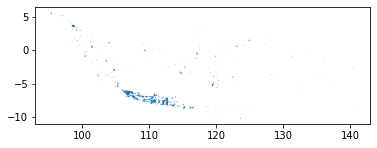

In [6]:
#cities_df is gdf
%matplotlib inline
cities_df.plot()

In [7]:
%time gdps=pp.obtainGDP("Indonesia")
#takes time

CPU times: user 39.8 s, sys: 25.4 s, total: 1min 5s
Wall time: 1min 40s


In [8]:
#there 2 returns
gdpDict,totGdpDict=gdps

In [9]:
dict(list(gdpDict.items())[0:2])

{4768.0:     raster_val                                           geometry
 0     265088.0  POLYGON ((105.74167 -6.51667, 105.74167 -6.525...
 1    4526032.0  POLYGON ((105.75000 -6.51667, 105.75000 -6.525...
 2    5542267.0  POLYGON ((105.75833 -6.51667, 105.75833 -6.525...
 3    3550938.0  POLYGON ((105.72500 -6.52500, 105.72500 -6.533...
 4   23250332.0  POLYGON ((105.73333 -6.52500, 105.73333 -6.533...
 5    6804464.0  POLYGON ((105.74167 -6.52500, 105.74167 -6.533...
 6    4501591.0  POLYGON ((105.75000 -6.52500, 105.75000 -6.533...
 7   13035710.0  POLYGON ((105.76667 -6.52500, 105.76667 -6.533...
 8   25108274.0  POLYGON ((105.73333 -6.53333, 105.73333 -6.541...
 9   15652170.0  POLYGON ((105.74167 -6.53333, 105.74167 -6.541...
 10  23503032.0  POLYGON ((105.75833 -6.53333, 105.75833 -6.541...
 11  49055284.0  POLYGON ((105.73333 -6.54167, 105.73333 -6.550...
 12   9044970.0  POLYGON ((105.74167 -6.54167, 105.74167 -6.550...
 13  11103312.0  POLYGON ((105.73333 -6.55000, 105.733

In [10]:
dict(list(totGdpDict.items())[0:4])

{4768.0: 195602055.0,
 6773.0: 42062448.0,
 6818.0: 972283610.0,
 3498.0: 1397346540.0}

Text(0.5, 1.0, 'Garut')

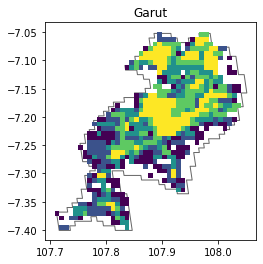

In [11]:
#let's take a look at gdp within a city
city_id= cities_df.sample(1).index[-1] #random city id
%matplotlib inline
ax=gpd.GeoSeries(cities_df.loc[city_id]["geometry"]).plot(color="w", edgecolor="k", alpha=0.6)
gdpDict[city_id].plot("raster_val",  scheme='quantiles', ax=ax)
plt.title(cities_df.loc[city_id]["eFUA_name"])

In [ ]:
#get country's boundary from gdam for plotting  (takes time) 
%time country_all=pp.obtainCountryBoundary("IDN", "ADM_0")

getting ADM_0 file....


In [ ]:
#let's make a big map
%matplotlib inline
ax=country_all.plot(color="w", edgecolor="k", alpha=0.6)
for k, v in totGdpDict.items():
    cities_df.at[k,"gdp_tot"]=v
cities_df["geometry"]=cities_df.centroid
cities_df.plot("gdp_tot",scheme="quantiles",alpha=0.4,ax=ax)

In [ ]:
#Done